In [93]:
# use bh_analysis_new
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as ply
import plotly.graph_objs as go
import numpy as np
import ast
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
pd.options.plotting.backend = "plotly"
init_notebook_mode(connected=True)
import pingouin as pg
import os


outlier_list=['sub-002']

In [94]:
def make_plot(df,*arg):
    fig = px.scatter(df.sort_index(), x='Electrode-Experiment-Session-run-Dimension', y='Coordinates', color='Subject')
    fig.show()
    fig.write_html(f'{Name}_Check_Outliersubjects_{arg[0]}_{arg[1]}.html')


In [95]:
def build_diff_trans_long_format(df,*args):
    df_diff=df.pivot_table('Coordinates',['Subject','Experiment','Electrode'],['Dimension','Session','run'])
    columns=df_diff.columns # baseline columns are [0,9,18,]
    for num,column in enumerate(columns):
        if not num in ([0,9,18]):
            if 'X' in column: 
                df_diff[column]=abs(df_diff[column]-df_diff[columns[0]])
            elif 'Y' in column:
                df_diff[column]=abs(df_diff[column]-df_diff[columns[9]])
            elif 'Z' in column:
                df_diff[column]=abs(df_diff[column]-df_diff[columns[18]])
    df_diff=df_diff.fillna('No_diff', inplace=False)     
    df_diff.head()

    df_diff_long=df_diff.stack().stack().stack()
    df_diff_long=df_diff_long.to_frame().reset_index().dropna()
    df_diff_long.columns=['Subject', 'Experiment', 'Electrode', 'run', 'Session', 'Dimension', 'Coordinate difference in mm']
    df_diff_long.dropna()
    df_diff_long=df_diff_long[df_diff_long['run']!='baseline']
    return df_diff_long

In [96]:
class struct:
    def __init__(self):
        self.coord_C1:int
        self.coord_C2:int
        self.coord_C3:int
        self.norm_C1:int
        self.norm_C2:int
        self.norm_C3:int
coord=struct()

In [97]:
#Sophie
df_concat=pd.read_csv('concat_Sophie.csv')
df_diff_long=pd.read_csv('df_diff_long_Sophie.csv')
Name='Sophie'


#df_concat=pd.read_csv('concat_Kyra.csv')
#df_diff_long=pd.read_csv('df_diff_long_Kyra.csv')
#Name='Kira'


In [98]:
df_concat
def add_columns(df):
    df['Dimension-Experiment']=df['Dimension'] + '_' + df['Experiment']
    df['Dimension-Experiment-Session']=df['Dimension'] + '_' + df['Experiment'] + '_' + df['Session']
    df['Dimension-Experiment-Electrode-Session-run']=df['Dimension'] + '_' + df['Experiment'] + '_' + df['Electrode'] + '_' + df['Session'] + '_' + df['run']
    df['Electrode-Experiment-Session-run-Dimension']=df['Electrode'] + '_' + df['Experiment'] + '_' + df['Session'] + '_' + df['run'] + '_' + df['Dimension'] 
    return df

df_concat=add_columns(df_concat)

list_subjects=df_concat['Subject'].unique()
list_electrode=df_concat['Electrode'].unique()


In [99]:
#df_diff_long['run'].unique()
df_diff_long=df_diff_long[df_diff_long['Coordinate difference in mm']!='No_diff']
df_diff_long_an=df_diff_long[df_diff_long['Electrode']=='Anode']
df_diff_long_an.to_csv('df_concat_a_diff_long_.csv')

# Analysis with original coordinates

In [100]:
#How many subjects
len(df_concat['Subject'].unique())

46

In [101]:
df_concat_a=df_concat[df_concat['Electrode']=='Anode']
df_concat_a
make_plot(df_concat_a, 'Anode',[])

<ipython-input-102-5905b792e0f3>:6: FutureWarning:

Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.



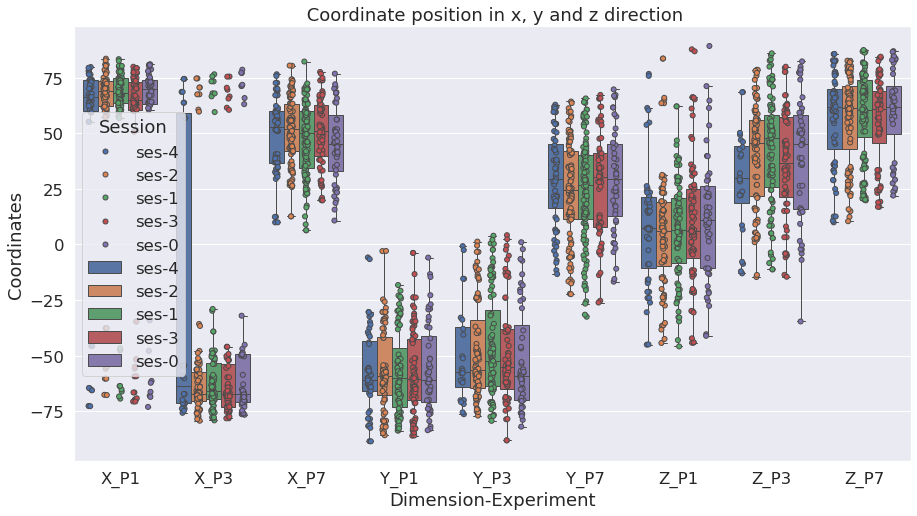

In [102]:
fig=plt.figure(figsize=(15,8))

df_concat_a=df_concat.sort_values(by=['Dimension' ,'Session', 'run'])


g=sns.stripplot(data=df_concat, x='Dimension-Experiment',y='Coordinates', hue='Session', jitter=True,linewidth=1, edgecolor='gray', dodge=True)
g=sns.boxplot(data=df_concat, x='Dimension-Experiment',y='Coordinates', hue='Session',fliersize=0.5).set(title=f' Coordinate position in x, y and z direction')

In [103]:
df_concat_a_diff_long=build_diff_trans_long_format(df_concat_a)
df_concat_a_diff_long=add_columns(df_concat_a_diff_long)
Subject_number=len(df_concat_a_diff_long['Subject'].unique())
fig = px.scatter(df_concat_a_diff_long, 
                 x='Dimension-Experiment-Electrode-Session-run', 
                 y='Coordinate difference in mm', 
                 color='Subject',
                 title=f'Subjects {Subject_number}')

fig.show()
fig.write_html(f'{Name}_Check_Outliersubjects_diff_corrected_Anode.html')

In [104]:
#df_concat_a_diff_long[(df_concat_a_diff_long['Electrode']=='Anode')]
#df_concat_a_diff_long['Session'].unique() 

In [105]:
df_concat_a_diff_long=df_concat_a_diff_long[df_concat_a_diff_long['Coordinate difference in mm']!='No_diff']


<ipython-input-106-34d56821a88f>:9: FutureWarning:

Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.

<ipython-input-106-34d56821a88f>:11: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.

<ipython-input-106-34d56821a88f>:11: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.

<ipython-input-106-34d56821a88f>:11: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.



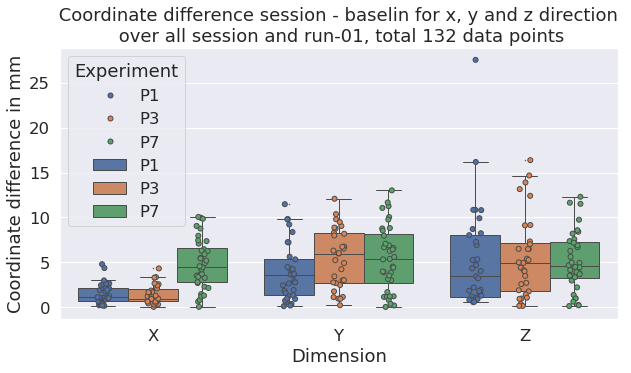

In [106]:
sns.set(font_scale=1.5)
fig=plt.figure(figsize=(10,5))
df_concat_a_diff_long_=df_concat_a_diff_long[(df_concat_a_diff_long['Electrode']=='Anode') & (df_concat_a_diff_long['run']=='run-01')]
df_concat_a_diff_long_=df_concat_a_diff_long_[df_concat_a_diff_long_['Coordinate difference in mm']!="No_diff"]
df_concat_a_diff_long_['Coordinate difference in mm']=pd.to_numeric(df_concat_a_diff_long_['Coordinate difference in mm'])
df_concat_a_diff_long_=df_concat_a_diff_long_.sort_values(by=['Dimension' ,'Session', 'run'])

Subject_numb=len(df_concat_a_diff_long_['Subject'].unique())*4
g=sns.stripplot(data=df_concat_a_diff_long_, x='Dimension',y='Coordinate difference in mm', hue='Experiment', jitter=True,linewidth=1, edgecolor='gray', dodge=True)
g=sns.boxplot(data=df_concat_a_diff_long_, x='Dimension',y='Coordinate difference in mm', hue='Experiment',fliersize=0.5).set(title=f' Coordinate difference session - baselin for x, y and z direction \n over all session and run-01, total {Subject_numb} data points')
fig.savefig('Electrode_Diff_run01')

<ipython-input-107-ca883b257767>:8: FutureWarning:

Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.

<ipython-input-107-ca883b257767>:10: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.

<ipython-input-107-ca883b257767>:10: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.

<ipython-input-107-ca883b257767>:10: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.



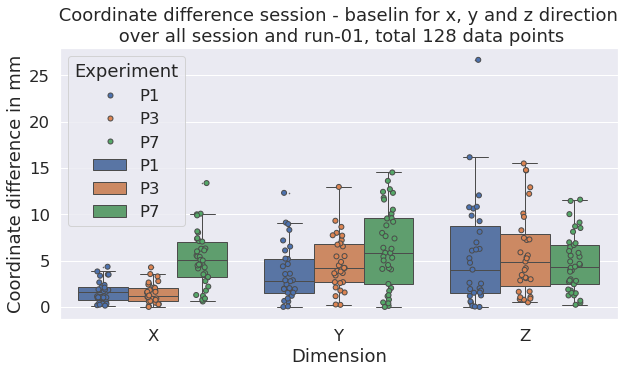

In [107]:
fig=plt.figure(figsize=(10,5))
df_concat_a_diff_long_=df_concat_a_diff_long[(df_concat_a_diff_long['Electrode']=='Anode') & (df_concat_a_diff_long['run']=='run-02')]
df_concat_a_diff_long_=df_concat_a_diff_long_[df_concat_a_diff_long_['Coordinate difference in mm']!="No_diff"]
df_concat_a_diff_long_['Coordinate difference in mm']=pd.to_numeric(df_concat_a_diff_long_['Coordinate difference in mm'])
df_concat_a_diff_long_=df_concat_a_diff_long_.sort_values(by=['Dimension' ,'Session', 'run'])

Subject_numb=len(df_concat_a_diff_long_['Subject'].unique())*4
g=sns.stripplot(data=df_concat_a_diff_long_, x='Dimension',y='Coordinate difference in mm', hue='Experiment', jitter=True,linewidth=1, edgecolor='gray', dodge=True)
g=sns.boxplot(data=df_concat_a_diff_long_, x='Dimension',y='Coordinate difference in mm', hue='Experiment',fliersize=0.5).set(title=f' Coordinate difference session - baselin for x, y and z direction \n over all session and run-01, total {Subject_numb} data points')
fig.savefig('Electrode_Diff_run02')

In [108]:
import scipy
run1=df_concat_a_diff_long[(df_concat_a_diff_long['Electrode']=='Anode') & (df_concat_a_diff_long['run']=='run-01')]['Coordinate difference in mm']
run2=df_concat_a_diff_long[(df_concat_a_diff_long['Electrode']=='Anode') & (df_concat_a_diff_long['run']=='run-02')]['Coordinate difference in mm'] 
scipy.stats.ttest_ind(run1,run2)

Ttest_indResult(statistic=-0.3902580854352111, pvalue=0.6964853847331889)

# time dependency

In [109]:
df_diff_long['date']

0       2023-05-17
1       2023-05-17
2       2023-05-17
3       2023-05-24
4       2023-05-24
           ...    
2935    2023-09-17
2936    2023-09-17
2937    2023-09-17
2938    2023-09-17
2939    2023-09-17
Name: date, Length: 2940, dtype: object

In [110]:
#len(df_diff_long_a['date'].unique()[0::10])

<ipython-input-111-6de51a8bb2b1>:29: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.

<ipython-input-111-6de51a8bb2b1>:29: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.

<ipython-input-111-6de51a8bb2b1>:29: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.



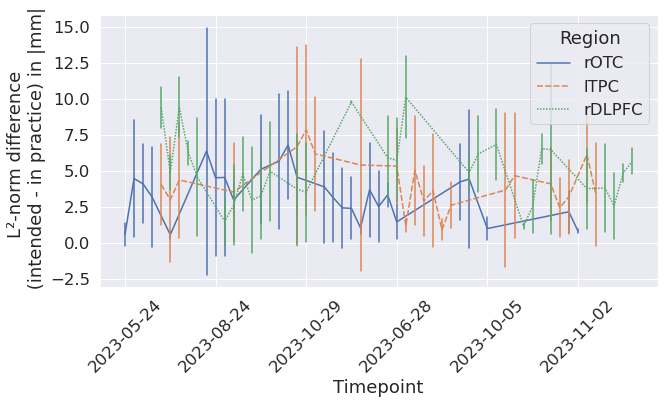

In [111]:
from matplotlib import pyplot, dates
P1='rOTC'
P3='lTPC'
P7='rDLPFC'

df_diff_long['Region']=df_diff_long['Experiment']
df_diff_long['Region']=df_diff_long['Region'].str.replace('P1',P1).str.replace('P3',P3).str.replace('P7',P7)
#


fig=plt.figure(figsize=(10,5))
df_diff_long_a=df_diff_long[(df_diff_long['Electrode']=='Anode') & (df_diff_long['Session']!='ses-0') & (df_diff_long['run']=='run-01')]
#outlier 
df_diff_long_a=df_diff_long_a[df_diff_long_a['Subject']!='sub-002']
#g=sns.lmplot(x="date", y="Coordinate difference in mm", data=df_diff_long_a, hue='Experiment')
g=sns.lineplot(x="date", y="Coordinate difference in mm", data=df_diff_long_a, hue='Region', style='Region', err_style='bars', errorbar='sd')
#g=sns.lineplot(x="date", y="Coordinate difference in mm", data=df_diff_long_a, err_style='bars', errorbar='se')


g.set(ylabel = 'L\u00b2-norm difference \n (intended - in practice) in |mm|', xlabel = 'Timepoint')

g.set(xticks=df_diff_long_a['date'].unique()[0::10])
g.set_xticklabels(df_diff_long_a['date'].unique()[0::10], rotation=90)
#g.figure.savefig('Correlation_date_Coordinate_diff')

g.tick_params(axis='x',labelrotation=45)
plt.tight_layout
#fig.savefig('Correlation_date_Coordinate_diff_band_sd_all.png')
g.figure.savefig('Correlation_date_Coordinate_diff_bars_sd.png', bbox_inches='tight')


In [112]:
#pd.to_datetime(df_diff_long_a['Date']).strftime('%Y-%m-%d')

In [113]:
from scipy import stats
date=df_diff_long_a['date'].to_numpy()
diff=df_diff_long_a['Coordinate difference in mm'].to_numpy()
#res=stats.pearsonr(date,diff)
res=stats.spearmanr(date,diff)
res

SpearmanrResult(correlation=0.045120534892583074, pvalue=0.44321443944807537)

In [114]:
date=df_diff_long_a[df_diff_long_a['Experiment']=='P1']['date'].to_numpy()
diff=df_diff_long_a[df_diff_long_a['Experiment']=='P1']['Coordinate difference in mm'].to_numpy()
#res=stats.pearsonr(date,diff)
res=stats.spearmanr(date,diff)
res

SpearmanrResult(correlation=0.08585942663295151, pvalue=0.42103006304802315)

In [115]:
date=df_diff_long_a[df_diff_long_a['Experiment']=='P3']['date'].to_numpy()
diff=df_diff_long_a[df_diff_long_a['Experiment']=='P3']['Coordinate difference in mm'].to_numpy()
#res=stats.pearsonr(date,diff)
res=stats.spearmanr(date,diff)
res

SpearmanrResult(correlation=-0.028849314826176604, pvalue=0.7836949464742498)

In [116]:
date=df_diff_long_a[df_diff_long_a['Experiment']=='P7']['date'].to_numpy()
diff=df_diff_long_a[df_diff_long_a['Experiment']=='P7']['Coordinate difference in mm'].to_numpy()
#res=stats.pearsonr(date,diff)
res=stats.spearmanr(date,diff)
res

SpearmanrResult(correlation=0.003418511470752254, pvalue=0.9719896969874142)

# Coordinates from VerFlu 


In [117]:
path_VerFlu_Coordinates="/media/Data01/Studien/VerFlu/code/SimNIBS/"
table="Coordinates_sub_and_mni2sub_all_Experiments.tsv"
df_VF=pd.read_csv(os.path.join(path_VerFlu_Coordinates, table), sep='\t')

# only focal experiments
df_VF=df_VF[(df_VF["Exp"]== "HD-tDCS IFG") | (df_VF["Exp"]== "HD-tDCS M1")]
df_VF['Dimension']=(df_VF['Electrode']
                    .str.replace('anode_','')
                    .str.replace('cathode_1_','')
                    .str.replace('cathode_2_','')
                    .str.replace('cathode_3_','')
                    )
df_VF['Electrode']=(df_VF['Electrode']
                    .str.replace('_x','')
                    .str.replace('_y','')
                    .str.replace('_z','')
                    )

In [118]:
# generate pivot table
df_VF_pv=df_VF.drop(columns='Unnamed: 0').pivot(index=['Session', 'Electrode', 'index','Exp'], values=["mni2sub","sub","diff"],columns='Dimension')
colum_intended=df_VF_pv.columns.to_list()[0:3]
colum_inpractice=df_VF_pv.columns.to_list()[3:6]


df_VF_pv['comb_intended']=df_VF_pv[colum_intended].values.round(2).tolist()
df_VF_pv['comb_inpractice']=df_VF_pv[colum_inpractice].values.round(2).tolist()



In [119]:
def get_diff_norm_coord(df,index):    
    base_coord=df.loc[index]['comb_intended'][0] # go through all electrodes of baseline measurment
    #print(base_coord)
    #generiere 3 Abstände für jede Elektore 1 und wähle Minimum aus um entsprechende baseline Werte zu ersetzen
    run_coord=df.loc[(index)]['comb_inpractice'][0]
    #print(run_coord)
    norm_coord=np.linalg.norm(np.array(base_coord) - np.array(run_coord))

    return norm_coord

dict_norm_diff_VF={}
for num,index in enumerate(df_VF_pv.index):
    norm_coord = get_diff_norm_coord(df_VF_pv,index)
    dict_norm_diff_VF[index]=[norm_coord][0]

In [120]:
dict_norm_diff_VF.keys()
dict_norm_diff_VF.values()
frame={'index':dict_norm_diff_VF.keys(),
       'Diff_Norm':dict_norm_diff_VF.values()}
result = pd.DataFrame(frame)
result=result.set_index('index')
result
df_VF_pv['Diff_Norm']=result['Diff_Norm']
df_VF_pv=df_VF_pv.reset_index()
df_VF_pv.head()


Session Electrode   index          Exp    mni2sub             \
Dimension                                                 x          y   
0            Kopf     anode  sub-01  HD-tDCS IFG -63.549152   9.242825   
1            Kopf     anode  sub-02  HD-tDCS IFG -64.738739  14.719998   
2            Kopf     anode  sub-02   HD-tDCS M1 -63.798527 -40.118202   
3            Kopf     anode  sub-03  HD-tDCS IFG -70.852837  12.086543   
4            Kopf     anode  sub-03   HD-tDCS M1 -66.949379 -32.679127   

                       sub                  diff                        \
Dimension          z     x     y     z         x          y          z   
0          36.584892 -66.0   2.0  37.0  2.450848   7.242825   0.415108   
1          32.912300 -65.0  10.0  27.0  0.261261   4.719998   5.912300   
2          42.180904 -66.0 -46.0  39.0  2.201473   5.881798   3.180904   
3          41.613171 -74.0   5.0  34.0  3.147163   7.086543   7.613171   
4          56.458736 -70.0 -16.0  44.0  3.050621  16.679127  12.458736   

                     comb_intended       comb_inpractice  Diff_Norm  
Dimension                                                            
0            [-63.55, 9.24, 36.58]    [-66.0, 2.0, 37.0]   7.654835  
1           [-64.74, 14.72, 32.91]   [-65.0, 10.0, 27.0]   7.567965  
2           [-63.8, -40.12, 42.18]  [-66.0, -46.0, 39.0]   7.037528  
3           [-70.85, 12.09, 41.61]    [-74.0, 5.0, 34.0]  10.867507  
4          [-66.95, -32.68, 56.46]  [-70.0, -16.0, 44.0]  21.042255

In [121]:
df_VF_pv.groupby(['Electrode']).agg(['mean','std'])

<ipython-input-121-93928f5b7844>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

<ipython-input-121-93928f5b7844>:1: FutureWarning:

[('Session', ''), ('index', ''), ('Exp', ''), ('comb_intended', ''), ('comb_inpractice', '')] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



mni2sub                                                         \
Dimension          x                     y                     z              
                mean        std       mean        std       mean        std   
Electrode                                                                     
anode     -63.754419   5.155125  -1.846292  20.376560  37.675542  20.144866   
cathode_1 -35.995356   8.589466  20.502590  36.159800  59.406599  21.973739   
cathode_2 -64.042486  12.996171 -15.530156  21.543921  44.219798  14.850401   
cathode_3 -70.121184   4.113701  -5.700483  35.679650   0.953746  25.020709   

                 sub                                                         \
Dimension          x                     y                     z              
                mean        std       mean        std       mean        std   
Electrode                                                                     
anode     -66.215054   5.374759   0.301075  18.686652  29.107527  22.013564   
cathode_1 -45.892473   9.163328  19.096774  31.438022  49.881720  24.203328   
cathode_2 -69.064516  11.658927 -36.494624  18.059457  35.075269  16.185901   
cathode_3 -65.946237  11.177778  11.516129  14.704046  -5.473118  31.041904   

               diff                                                         \
Dimension         x                     y                     z              
               mean        std       mean        std       mean        std   
Electrode                                                                    
anode      2.840718   2.219462   5.978365   4.451363   8.945175   5.991650   
cathode_1  9.943207   4.642335   8.799009  11.038884   9.722816   6.586932   
cathode_2  8.765169  13.580756  27.933053  31.231853  11.758170  11.388007   
cathode_3  4.941026  10.540991  27.202605  29.136343  12.042374   8.663726   

           Diff_Norm             
Dimension                        
                mean        std  
Electrode                        
anode      12.330491   5.667402  
cathode_1  18.474570  10.748474  
cathode_2  33.698137  33.879479  
cathode_3  34.137058  27.863501

In [122]:
# get statistics for anode
norm_anode_VF=df_VF_pv[df_VF_pv['Electrode']=='anode']['Diff_Norm'].values
diff_x_anode_VF=df_VF_pv[df_VF_pv['Electrode']=='anode'][('diff','x')].values
diff_y_anode_VF=df_VF_pv[df_VF_pv['Electrode']=='anode'][('diff','y')].values
diff_z_anode_VF=df_VF_pv[df_VF_pv['Electrode']=='anode'][('diff','z')].values


In [123]:
norm_anode_VF

array([ 7.65483507,  7.56796538,  7.03752798, 10.86750661, 21.04225511,
        8.75773373,  9.761337  ,  5.06218332,  8.68674853, 12.85061866,
       15.87980793,  5.73949475, 13.25118108,  1.59677801,  5.14082678,
       17.90616095, 17.70094348,  7.93296918,  6.68371902, 16.52692954,
       11.48016115, 14.88777015, 21.04154224, 14.45942253, 16.26867235,
       13.53830861, 11.22658007, 14.62363498,  4.52615731,  6.49982307,
       15.51062217,  3.70724965, 14.31913754, 13.30871895, 15.6191421 ,
       24.5207871 , 11.88316877,  8.56023364, 16.23222412, 10.91853928,
        9.81987271, 13.50242941, 27.49253171,  6.42319235, 22.93933521,
       10.6752658 , 26.43169499,  9.07343926,  7.3248959 , 11.32772263,
        3.94830343,  5.59276318, 10.03763418, 20.36966617,  5.10519343,
       14.35505834, 16.7095362 , 13.25642486,  6.3560129 , 21.13218635,
        4.73228275, 16.19667558,  8.09405337, 23.25868655,  2.94769401,
        6.051884  ,  9.10371902, 11.43703196, 20.63561   , 18.28

In [124]:
# create array from MeMoSLAP data set
df_anode_run01=df_concat_a_diff_long[(df_concat_a_diff_long['Electrode']=='Anode') & (df_concat_a_diff_long['run']=='run-01')]
diff_x_anode=df_anode_run01[df_anode_run01['Dimension']=='X']['Coordinate difference in mm'].values
diff_y_anode=df_anode_run01[df_anode_run01['Dimension']=='Y']['Coordinate difference in mm'].values
diff_z_anode=df_anode_run01[df_anode_run01['Dimension']=='Z']['Coordinate difference in mm'].values

In [125]:
print('ind ttest x dim:', scipy.stats.ttest_ind(diff_x_anode_VF,diff_x_anode, alternative='greater'))
print('ind ttest y dim:',scipy.stats.ttest_ind(diff_y_anode_VF,diff_y_anode, alternative='greater'))
print('ind ttest z dim:',scipy.stats.ttest_ind(diff_z_anode_VF,diff_z_anode, alternative='greater'))

print('mean, std ( X dim) VerFLu;', np.mean(diff_x_anode_VF).round(2), np.std(diff_x_anode_VF).round(2),'len',len(diff_x_anode_VF), 'MeMoSLAP', np.mean(diff_x_anode).round(2), np.std(diff_x_anode).round(2),'len', len(diff_x_anode))
print('mean, std ( Y dim) VerFLu;', np.mean(diff_y_anode_VF).round(2), np.std(diff_y_anode_VF).round(2),'len',len(diff_y_anode_VF), 'MeMoSLAP', np.mean(diff_y_anode).round(2), np.std(diff_y_anode).round(2),'len', len(diff_y_anode))
print('mean, std ( Z dim) VerFLu;', np.mean(diff_z_anode_VF).round(2), np.std(diff_z_anode_VF).round(2),'len',len(diff_z_anode_VF), 'MeMoSLAP', np.mean(diff_z_anode).round(2), np.std(diff_z_anode).round(2),'len', len(diff_z_anode))



ind ttest x dim: Ttest_indResult(statistic=0.4300437485027534, pvalue=0.33382430903135013)
ind ttest y dim: Ttest_indResult(statistic=1.8589387845220628, pvalue=0.0322870714439553)
ind ttest z dim: Ttest_indResult(statistic=4.780466871209535, pvalue=1.741750650624772e-06)
mean, std ( X dim) VerFLu; 2.84 2.21 len 93 MeMoSLAP 2.69 2.46 len 100
mean, std ( Y dim) VerFLu; 5.98 4.43 len 93 MeMoSLAP 4.92 3.41 len 100
mean, std ( Z dim) VerFLu; 8.95 5.96 len 93 MeMoSLAP 5.3 4.53 len 100


In [126]:
#scipy.stats.ttest_ind(diff_x_anode_VF,diff_x_anode)
diff_x_anode

array([0.20094567250460216, 0.6487999883666618, 2.4272556546330435,
       0.9951065386831743, 4.782833013162019, 1.0295735919475533,
       2.059861930608747, 0.8396350040659257, 0.01776709280441935,
       0.9025868325168318, 6.4600281641632336, 1.1713392753899114,
       9.044300422146925, 2.6242744208872324, 1.8908746031671768,
       1.0091154457628733, 1.9156011597812181, 8.757932278215883,
       4.315139389485118, 2.129883157908914, 4.899699325561521,
       0.6091584159061298, 2.275441065523772, 4.208053073007612,
       7.439584375731648, 1.744309708550574, 2.5846529155224545,
       2.4111017354298383, 3.283997860737145, 1.6506406386615708,
       2.0773965361714346, 1.2246154303848726, 1.0466677005588991,
       0.17422380104660817, 0.8482227540761187, 0.3685807396844041,
       0.4515372232720267, 4.351602967567743, 2.6110815067961823,
       0.34082239339127796, 3.339238227382303, 0.9455814110487708,
       2.527399052754049, 1.8393308863788889, 0.4070781943202064,
      

# Read in from PhD manually extracted coordinates

In [157]:
path_man="/media/Data03/Studies/MeMoSLAP/code/Automated_Electrode_Coordinate_Extraction/electrode_extraction_from_network"
file="df_concat_manually_extr.csv"
df_concat_man=pd.read_csv(os.path.join(path_man,file))

P1='rOTC'
P3='lTPC'
P7='rDLPFC'

df_concat_man['Region']=df_concat_man['Experiment']
df_concat_man['Region']=df_concat_man['Region'].str.replace('P1',P1).str.replace('P3',P3).str.replace('P7',P7)


df_concat_man.head()

Unnamed: 0 Electrode     run Session  Subject Dimension  Coordinates  \
0           0     Anode  run-01   ses-4  sub-015         X    74.094224   
1           1  Cathode1  run-01   ses-4  sub-015         X    74.044583   
2           2  Cathode2  run-01   ses-4  sub-015         X    62.659286   
3           3  Cathode3  run-01   ses-4  sub-015         X    78.118825   
4           4     Anode  run-02   ses-4  sub-015         X    74.062845   

  Experiment Region  
0         P1   rOTC  
1         P1   rOTC  
2         P1   rOTC  
3         P1   rOTC  
4         P1   rOTC

In [161]:
df_concat_man_a=df_concat_man[df_concat_man['Electrode']=='Anode']


df_concat_man_a_diff_long=build_diff_trans_long_format(df_concat_man_a)
#df_concat_man_a_diff_long=add_columns(df_concat_man_a_diff_long)
#Subject_number=len(df_concat_man_a_diff_long['Subject'].unique())
#fig = px.scatter(df_concat_man_a_diff_long, 
#                 x='Dimension-Experiment-Electrode-Session-run', 
#                 y='Coordinate difference in mm', 
#                 color='Subject',
#                 title=f'Subjects {Subject_number}')

#fig.show()
#fig.write_html(f'{Name}_Check_Outliersubjects_diff_corrected_Anode_manually_extract.html')

In [183]:
diff_x_anode=df_concat_man_a_diff_long[(df_concat_man_a_diff_long['run']=='run-01') 
                                       & (df_concat_man_a_diff_long['Dimension']=='X') 
                                       & (df_concat_man_a_diff_long['Coordinate difference in mm'] != 'No_diff')]['Coordinate difference in mm'].values
diff_y_anode=df_concat_man_a_diff_long[(df_concat_man_a_diff_long['run']=='run-01') 
                                       & (df_concat_man_a_diff_long['Dimension']=='Y') 
                                       & (df_concat_man_a_diff_long['Coordinate difference in mm'] != 'No_diff')]['Coordinate difference in mm'].values
diff_z_anode=df_concat_man_a_diff_long[(df_concat_man_a_diff_long['run']=='run-01') 
                                       & (df_concat_man_a_diff_long['Dimension']=='Z') 
                                       & (df_concat_man_a_diff_long['Coordinate difference in mm'] != 'No_diff')]['Coordinate difference in mm'].values


In [191]:
print(diff_x_anode[(diff_x_anode<30) & (diff_x_anode>-30)].mean())
print(diff_y_anode[(diff_y_anode<30) & (diff_y_anode>-30)].mean())
print(diff_z_anode[(diff_z_anode<30) & (diff_z_anode>-30)].mean())

2.4632232413070705
3.767010366918773
5.01730780040408


In [192]:
len(diff_x_anode)

107

In [193]:
len(diff_x_anode[(diff_x_anode<30) & (diff_x_anode>-30)])

66

# Get NORM

In [127]:
   #dist = np.zeros(len(coords) ** 2, dtype=int)

    #for idx, (coord1, coord2) in enumerate(product(coords, coords)):
    #    dist[idx] = np.linalg.norm(coord1 - coord2)

    #dist = dist.reshape(len(coords), len(coords))

    #anode = coords[np.argmin(np.sum(dist, axis=1))]


In [128]:
df_dim=df_concat.drop(columns='Unnamed: 0').pivot(index=['Subject','Experiment','Session','run','Electrode'],columns=['Dimension'], values=['Coordinates'])
columns_list=df_dim.columns
df_dim['combined']=df_dim[columns_list].values.tolist()
df_dim

Coordinates             \
Dimension                                               X          Y   
Subject Experiment Session run      Electrode                          
sub-001 P1         ses-0   baseline Anode       74.080000 -61.420000   
                                    Cathode1    64.130000 -81.920000   
                                    Cathode2    66.810000 -64.150000   
                                    Cathode3    80.850000 -34.220000   
                   ses-1   run-01   Anode       73.879054 -61.316858   
...                                                   ...        ...   
sub-064 P3         ses-1   run-01   Cathode3   -47.727866 -71.297569   
                           run-02   Anode      -67.889606 -53.296503   
                                    Cathode1   -68.076192 -64.545057   
                                    Cathode2   -63.283204 -14.651144   
                                    Cathode3   -47.748518 -72.187579   

                                                          \
Dimension                                              Z   
Subject Experiment Session run      Electrode              
sub-001 P1         ses-0   baseline Anode       3.590000   
                                    Cathode1   22.880000   
                                    Cathode2  -25.340000   
                                    Cathode3   13.940000   
                   ses-1   run-01   Anode       5.109130   
...                                                  ...   
sub-064 P3         ses-1   run-01   Cathode3   62.822375   
                           run-02   Anode      40.426973   
                                    Cathode1    5.060334   
                                    Cathode2   45.486892   
                                    Cathode3   61.907240   

                                                                                        combined  
Dimension                                                                                         
Subject Experiment Session run      Electrode                                                     
sub-001 P1         ses-0   baseline Anode                                  [74.08, -61.42, 3.59]  
                                    Cathode1                              [64.13, -81.92, 22.88]  
                                    Cathode2                             [66.81, -64.15, -25.34]  
                                    Cathode3                              [80.85, -34.22, 13.94]  
                   ses-1   run-01   Anode      [73.8790543274954, -61.31685764994472, 5.10913...  
...                                                                                          ...  
sub-064 P3         ses-1   run-01   Cathode3   [-47.7278664461337, -71.29756898991764, 62.822...  
                           run-02   Anode      [-67.8896060984116, -53.29650256317109, 40.426...  
                                    Cathode1   [-68.07619162788615, -64.54505734704435, 5.060...  
                                    Cathode2   [-63.28320443863049, -14.65114396251738, 45.48...  
                                    Cathode3   [-47.7485176816117, -72.18757909815758, 61.907...  

[1052 rows x 4 columns]

<ipython-input-129-3c545f3befac>:12: FutureWarning:

Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.

<ipython-input-129-3c545f3befac>:14: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.

<ipython-input-129-3c545f3befac>:14: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.

<ipython-input-129-3c545f3befac>:14: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.



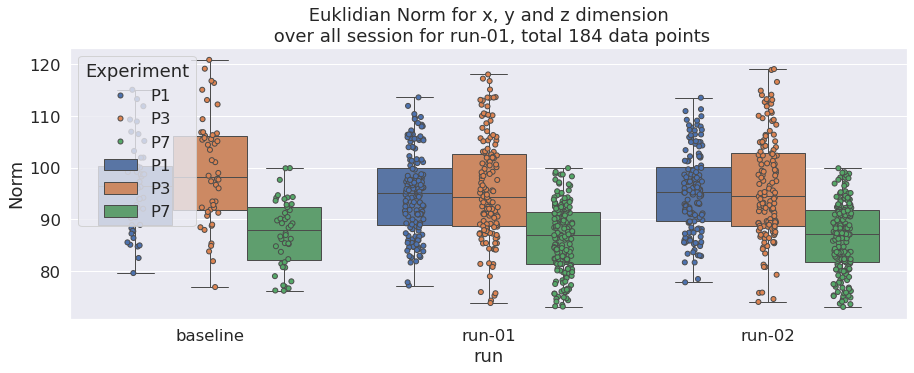

In [129]:
def plot_norm(df,*args):

    df_norm=df[(   'combined',  '')].apply(lambda x:np.linalg.norm(np.array(x)))
    df['Norm']=df_norm
    
    df=df.reset_index()
    #df=df[df['Electrode']=='Anode']

    fig=plt.figure(figsize=(15,5))
    Subject_numb=len(df['Subject'].unique())*4
    if args:
        g=sns.stripplot(data=df, x='run',y='Norm', hue=args[0], jitter=True,linewidth=1, edgecolor='gray', dodge=True)
        g=sns.boxplot(data=df, x='run',y='Norm', hue=args[0],fliersize=0.5).set(title=f' Euklidian Norm for x, y and z dimension \n over all session for run-01, total {Subject_numb} data points')
        fig.savefig(f'Norm for baseline and run-01 and run-02 Experiment')
    else:
        g=sns.stripplot(data=df, x='run',y='Norm',  jitter=True,linewidth=1, edgecolor='gray', dodge=True)
        g=sns.boxplot(data=df, x='run',y='Norm', fliersize=0.5).set(title=f' Euklidian Norm for x, y and z dimension \n over all session for run-01, total {Subject_numb} data points')
 
        fig.savefig(f'Norm for baseline and pre measured Petra')
    
    return df
df_dim_norm=plot_norm(df_dim,'Experiment')
#df_dim_norm=plot_norm(df_dim)

In [130]:
df_dim_norm.columns=['Subject', 'Experiment','Session','run','Electrode','X','Y','Z','combined','Norm']
df_dim_norm_2=df_dim_norm[['Subject', 'Experiment','Session','run','Electrode','combined']]
df_dim_norm['ind']=df_dim_norm['Subject'] +'_'+ df_dim_norm['Experiment'] +'_'+ df_dim_norm['Session'] +'_'+ df_dim_norm['run'] +'_'+ df_dim_norm['Electrode']
df_dim_norm['ind_2']=df_dim_norm['Subject'] +'_'+ df_dim_norm['Experiment'] +'_'+ df_dim_norm['Session']
df_dim_norm['ind_3']=df_dim_norm['Subject'] +'_'+ df_dim_norm['run'] 
df_dim_norm['ind_4']=df_dim_norm['Subject']  +'_'+ df_dim_norm['Session'] +'_'+ df_dim_norm['run'] 
df_dim_norm['ind_5']=df_dim_norm['Subject'] +'_'+ df_dim_norm['Session'] +'_'+ df_dim_norm['run'] 

df_dim_norm.to_csv(f'df_dim_norm_{Name}.csv')

In [131]:
df_dim

Coordinates             \
Dimension                                               X          Y   
Subject Experiment Session run      Electrode                          
sub-001 P1         ses-0   baseline Anode       74.080000 -61.420000   
                                    Cathode1    64.130000 -81.920000   
                                    Cathode2    66.810000 -64.150000   
                                    Cathode3    80.850000 -34.220000   
                   ses-1   run-01   Anode       73.879054 -61.316858   
...                                                   ...        ...   
sub-064 P3         ses-1   run-01   Cathode3   -47.727866 -71.297569   
                           run-02   Anode      -67.889606 -53.296503   
                                    Cathode1   -68.076192 -64.545057   
                                    Cathode2   -63.283204 -14.651144   
                                    Cathode3   -47.748518 -72.187579   

                                                          \
Dimension                                              Z   
Subject Experiment Session run      Electrode              
sub-001 P1         ses-0   baseline Anode       3.590000   
                                    Cathode1   22.880000   
                                    Cathode2  -25.340000   
                                    Cathode3   13.940000   
                   ses-1   run-01   Anode       5.109130   
...                                                  ...   
sub-064 P3         ses-1   run-01   Cathode3   62.822375   
                           run-02   Anode      40.426973   
                                    Cathode1    5.060334   
                                    Cathode2   45.486892   
                                    Cathode3   61.907240   

                                                                                        combined  \
Dimension                                                                                          
Subject Experiment Session run      Electrode                                                      
sub-001 P1         ses-0   baseline Anode                                  [74.08, -61.42, 3.59]   
                                    Cathode1                              [64.13, -81.92, 22.88]   
                                    Cathode2                             [66.81, -64.15, -25.34]   
                                    Cathode3                              [80.85, -34.22, 13.94]   
                   ses-1   run-01   Anode      [73.8790543274954, -61.31685764994472, 5.10913...   
...                                                                                          ...   
sub-064 P3         ses-1   run-01   Cathode3   [-47.7278664461337, -71.29756898991764, 62.822...   
                           run-02   Anode      [-67.8896060984116, -53.29650256317109, 40.426...   
                                    Cathode1   [-68.07619162788615, -64.54505734704435, 5.060...   
                                    Cathode2   [-63.28320443863049, -14.65114396251738, 45.48...   
                                    Cathode3   [-47.7485176816117, -72.18757909815758, 61.907...   

                                                     Norm  
Dimension                                                  
Subject Experiment Session run      Electrode              
sub-001 P1         ses-0   baseline Anode       96.297201  
                                    Cathode1   106.522475  
                                    Cathode2    96.025591  
                                    Cathode3    88.893501  
                   ses-1   run-01   Anode       96.145592  
...                                                   ...  
sub-064 P3         ses-1   run-01   Cathode3   106.338814  
                           run-02   Anode       95.309265  
                                    Cathode1    93.947002  
                                    Cathode2    79.299920  
               

# get difference of norm

In [132]:
def get_diff_norm_coord(df_dim,sub, exp,ses, run,electr):    
    base_coord=df_dim.loc[(sub, exp , 'ses-0', 'baseline',electr)]['combined'][0] # go through all electrodes of baseline measurment
    #generiere 3 Abstände für jede Elektore 1 und wähle Minimum aus um entsprechende baseline Werte zu ersetzen
    run_coord=df_dim.loc[(sub, exp , ses, run, electr)]['combined'][0]

    norm_coord=np.linalg.norm(np.array(base_coord) - np.array(run_coord))

    return norm_coord

dict_norm_diff={}
for num,index in enumerate(df_dim.index):
    sub=index[0]
    exp=index[1]
    ses=index[2]
    run=index[3]
    electr=index[4]

    if (sub, exp,'ses-0','baseline','Anode') in df_dim.index:
        norm_coord = get_diff_norm_coord(df_dim,sub, exp,ses, run,electr)
        dict_norm_diff[(sub, exp , ses, run, electr)]=[norm_coord][0]

        
    #if ((sub, exp,ses,run,electr) in df_dim.index) and (not (sub, exp,'ses-0','baseline','Anode') in df_dim.index):
    #    print('Seems no Anode for',sub, exp,ses,run,electr )
    #    error=error+1
        
    #    dict_coords[(sub, exp , ses, run, electr)]=df_dim.loc[(sub, exp , ses, run, electr)]['combined'][0][0]


 
    



In [133]:
dict_norm_diff.keys()
dict_norm_diff.values()
frame={'index':dict_norm_diff.keys(),
       'Diff_Norm':dict_norm_diff.values()}
result = pd.DataFrame(frame)
result=result.set_index('index')
result
df_dim['Diff_Norm']=result['Diff_Norm']
df_dim=df_dim.reset_index()
df_dim.columns=['Subject','Region','Session','run', 'Electrode','X','Y','Z','combined','Norm','Diff_Norm']
df_dim['Subject']=df_dim['Subject'].str.replace('sub-','')

def add_columns(df_dim_norm):
       df_dim_norm['ind']=df_dim_norm['Subject'] +'_'+ df_dim_norm['Region'] +'_'+ df_dim_norm['Session'] +'_'+ df_dim_norm['run'] +'_'+ df_dim_norm['Electrode']
       df_dim_norm['ind_2']=df_dim_norm['Subject'] +'_'+ df_dim_norm['Region'] +'_'+ df_dim_norm['Session']
       df_dim_norm['ind_3']=df_dim_norm['Subject'] +'_'+ df_dim_norm['run'] 
       df_dim_norm['ind_4']=df_dim_norm['Subject']  +'_'+ df_dim_norm['Session'] +'_'+ df_dim_norm['run'] 
       df_dim_norm['ind_5']=df_dim_norm['Subject'] +'_'+ df_dim_norm['Session'] +'_'+ df_dim_norm['run'] 
       return df_dim_norm
df_dim=add_columns(df_dim)
df_dim.to_csv(f'df_dim_norm_diff_{Name}.csv')

In [134]:
df_dim=df_dim.reset_index()

In [135]:
df_dim=df_dim[df_dim['Electrode']=='Anode']

In [136]:
list_sub=[]
for sub in df_dim['Subject'].unique():
    if (len((df_dim[(df_dim['Subject'] == sub)]['Session'].unique())) == 5) & (len((df_dim[(df_dim['Subject'] == sub)]['run'])) == 9):
        list_sub.append(sub)

print(list_sub)
df_dim_coml=df_dim[df_dim['Subject'].isin(list_sub)]
df_dim_coml.to_csv('df_dim_compl.csv')



['001', '006', '010', '011', '015', '017', '025', '034', '043', '058', '062']


In [137]:
len(df_dim_coml['Subject'].unique())

11

In [138]:
13*(4*2+1)*4
#13*9
len(df_dim_coml)/13

7.615384615384615

In [139]:
def make_plot_norm(df,*arg):
    df=df[df['Electrode']=='Anode']
    fig = px.scatter(df.sort_index(), x='run', y='Diff_Norm', color='Subject')
    fig.show()
    #fig.write_html(f'{Name}_Check_Outliersubjects_Diff_Norm_{arg[0]}_{arg[1]}.html')
make_plot_norm(df_dim)

In [226]:
def ttest(df_dim,a_str,b_str):

    # make sure run-01 and run-02 array has same length
    df_test=df_dim[(df_dim['Electrode']=='Anode') & (df_dim['run']!='baseline')].dropna() 
    df_test=df_test.pivot(index=['Subject','Region','Session','Electrode'], columns='run', values=['X','Y','Z','Diff_Norm']).dropna()
    df_dim_mod=df_test.stack().reset_index()

    a=df_dim_mod[(df_dim_mod['Electrode']=='Anode') & (df_dim_mod['run']==a_str)]['Diff_Norm'].dropna() 
    b=df_dim_mod[(df_dim_mod['Electrode']=='Anode') & (df_dim_mod['run']==b_str)]['Diff_Norm'].dropna() 
    
    print(len(a),'=',len(b))

    return(a, b) 
[a,b]=ttest(df_dim,'run-01','run-02')
print('run-01',scipy.stats.ttest_1samp(a, popmean=0.05))
print('run-02',scipy.stats.ttest_1samp(b, popmean=0.05))
print('run-01 vs run-02',scipy.stats.ttest_rel(a,b))


98 = 98
run-01 Ttest_1sampResult(statistic=18.893254529264613, pvalue=2.8297976587866865e-34)
run-02 Ttest_1sampResult(statistic=19.05224272866481, pvalue=1.4890980223204056e-34)
run-01 vs run-02 Ttest_relResult(statistic=-0.11275520473662429, pvalue=0.9104576562460234)


In [141]:
len(df_dim['Subject'].unique())

46

In [225]:
df_dim

index Subject Region Session       run Electrode          X          Y  \
0         0     001     P1   ses-0  baseline     Anode  74.080000 -61.420000   
4         4     001     P1   ses-1    run-01     Anode  73.879054 -61.316858   
8         8     001     P1   ses-1    run-02     Anode  72.926133 -62.009124   
12       12     001     P1   ses-2    run-01     Anode  73.431200 -57.324001   
16       16     001     P1   ses-2    run-02     Anode  72.438589 -57.830780   
...     ...     ...    ...     ...       ...       ...        ...        ...   
1032   1032     062     P3   ses-3    run-02     Anode -68.633546 -39.405293   
1036   1036     062     P3   ses-4    run-01     Anode -71.536882 -37.952621   
1040   1040     062     P3   ses-4    run-02     Anode -71.499224 -40.643215   
1044   1044     064     P3   ses-1    run-01     Anode -67.865806 -52.394124   
1048   1048     064     P3   ses-1    run-02     Anode -67.889606 -53.296503   

              Z                                           combined       Norm  \
0      3.590000                              [74.08, -61.42, 3.59]  96.297201   
4      5.109130  [73.8790543274954, -61.31685764994472, 5.10913...  96.145592   
8      4.083106  [72.92613349482417, -62.00912444991991, 4.0831...  95.812443   
12    -5.112304  [73.43120001163334, -57.32400138583034, -5.112...  93.296934   
16    -7.020953  [72.43858918733895, -57.8307798425667, -7.0209...  92.957206   
...         ...                                                ...        ...   
1032  40.036707  [-68.63354580570012, -39.405292727053165, 40.0...  88.692044   
1036  22.883620  [-71.53688209690154, -37.9526209840551, 22.883...  84.152166   
1040  23.837228  [-71.49922432657331, -40.6432147109881, 23.837...  85.628403   
1044  40.439420  [-67.86580561171286, -52.39412412326783, 40.43...  94.795878   
1048  40.426973  [-67.8896060984116, -53.29650256317109, 40.426...  95.309265   

      Diff_Norm                          ind         ind_2         ind_3  \
0      0.000000  001_P1_ses-0_baseline_Anode  001_P1_ses-0  001_baseline   
4      1.535830    001_P1_ses-1_run-01_Anode  001_P1_ses-1    001_run-01   
8      1.386228    001_P1_ses-1_run-02_Anode  001_P1_ses-1    001_run-02   
12     9.639929    001_P1_ses-2_run-01_Anode  001_P1_ses-2    001_run-01   
16    11.321177    001_P1_ses-2_run-02_Anode  001_P1_ses-2    001_run-02   
...         ...                          ...           ...           ...   
1032   7.990038    062_P3_ses-3_run-02_Anode  062_P3_ses-3    062_run-02   
1036  15.543175    062_P3_ses-4_run-01_Anode  062_P3_ses-4    062_run-01   
1040  13.436820    062_P3_ses-4_run-02_Anode  062_P3_ses-4    062_run-02   
1044        NaN    064_P3_ses-1_run-01_Anode  064_P3_ses-1    064_run-01   
1048        NaN    064_P3_ses-1_run-02_Anode  064_P3_ses-1    064_run-02   

                   ind_4               ind_5  
0     001_ses-0_baseline  001_ses-0_baseline  
4       001_ses-1_run-01    001_ses-1_run-01  
8       001_ses-1_run-02    001_ses-1_run-02  
12      001_ses-2_run-01    001_ses-2_run-01  
16      001_ses-2_run-02    001_ses-2_run-02  
...                  ...                 ...  
1032    062_ses-3_run-02    062_ses-3_run-02  
1036    062_ses-4_run-01    062_ses-4_run-01  
1040    062_ses-4_run-02    062_ses-4_run-02  
1044    064_ses-1_run-01    064_ses-1_run-01  
1048    064_ses-1_run-02    064_ses-1_run-02  

[263 rows x 17 columns]

In [221]:
df_test.stack().reset_index()

Subject Region Session Electrode     run          X          Y          Z  \
0       001     P1   ses-1     Anode  run-01  73.879054 -61.316858   5.109130   
1       001     P1   ses-1     Anode  run-02  72.926133 -62.009124   4.083106   
2       001     P1   ses-2     Anode  run-01  73.431200 -57.324001  -5.112304   
3       001     P1   ses-2     Anode  run-02  72.438589 -57.830780  -7.020953   
4       001     P1   ses-3     Anode  run-01  71.652744 -64.053467  -3.676394   
..      ...    ...     ...       ...     ...        ...        ...        ...   
191     062     P3   ses-2     Anode  run-02 -70.544780 -48.808595  21.272791   
192     062     P3   ses-3     Anode  run-01 -68.633546 -39.405293  40.036707   
193     062     P3   ses-3     Anode  run-02 -68.633546 -39.405293  40.036707   
194     062     P3   ses-4     Anode  run-01 -71.536882 -37.952621  22.883620   
195     062     P3   ses-4     Anode  run-02 -71.499224 -40.643215  23.837228   

     Diff_Norm  
0     1.535830  
1     1.386228  
2     9.639929  
3    11.321177  
4     8.101061  
..         ...  
191  15.010877  
192   7.990038  
193   7.990038  
194  15.543175  
195  13.436820  

[196 rows x 9 columns]

## TTest independen comparison norm VerFlu data and reasearch unit

In [194]:
norm_anode_VF
b #norm anode MeMoSLAP
scipy.stats.ttest_ind(norm_anode_VF,b, alternative='greater' )


Ttest_indResult(statistic=4.819446719740187, pvalue=1.4641365043989027e-06)

In [195]:
print(np.mean(b),np.std(b),np.mean(norm_anode_VF),np.std(norm_anode_VF))

8.759017924608687 4.581804980583504 12.330491373547702 5.63684935570472


<ipython-input-187-fd37c1744703>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-187-fd37c1744703>:10: FutureWarning:

Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.



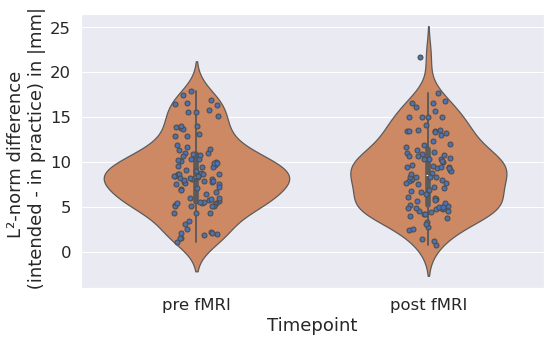

In [187]:
 
df=df_dim
#def plot_diff_norm(df):
#df=df.reset_index()


#df=df[df['Subject'] not in outlier_list]
df=df[(df['Electrode']=='Anode') & (df['run']!='baseline') & (df['Subject']!='002')]
df['run']=df['run'].str.replace('run-01','pre fMRI').str.replace('run-02','post fMRI')
fig=plt.figure(figsize=(8,5))
g=sns.stripplot(data=df, x='run',y='Diff_Norm', jitter=True,linewidth=1, edgecolor='gray', dodge=True)
g=sns.boxplot(data=df, x='run',y='Diff_Norm', fliersize=0.5)
#g=sns.violinplot(data=df, x='run',y='Diff_Norm')

g.set(ylabel = 'L\u00b2-norm difference \n (intended - in practice) in |mm|', xlabel = 'Timepoint')
#g.set(title=f' Difference Norm baseline - actual over all sessions \n run-01 pre task or resting state PETRA \n run-02 post task or resting state PETRA \n ' )
fig.tight_layout()
fig.savefig('Figure_6', dpi=300)
path='/media/AG-Share/01_Studien/00_FOR5429_MeMoSLAP/RU_Publications/Paper/JoVE/Figures'
fig.savefig(os.path.join(path,'Figure_6'), dpi=300)


In [41]:
df[['run','Diff_Norm']].groupby(['run']).agg(['mean','std'])

Diff_Norm          
               mean       std
run                          
post fMRI  8.974070  4.726749
pre fMRI   8.759018  4.604887

<ipython-input-185-1aae208a145b>:20: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.

<ipython-input-185-1aae208a145b>:20: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.

<ipython-input-185-1aae208a145b>:20: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.



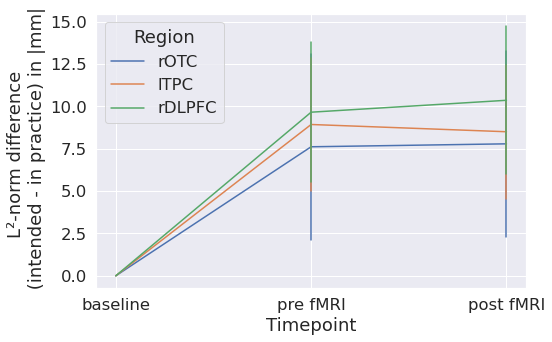

In [185]:
df=df_dim
#def plot_diff_norm(df):
#df=df.reset_index()

P1='rOTC'
P3='lTPC'
P7='rDLPFC'

df=df[(df['Electrode']=='Anode')]
df=df[df['Subject']!='sub-002']
df['run']=df['run'].str.replace('run-01','pre fMRI').str.replace('run-02','post fMRI')
df['Region']=df['Region'].str.replace('P1',P1).str.replace('P3',P3).str.replace('P7',P7)
#df['session_run']=df['Session'] + '_' + df['run']
fig=plt.figure(figsize=(8,5))

g=sns.lineplot(data=df, x='run',y='Diff_Norm', hue='Region', errorbar='sd', err_style="bars")
g.set(ylabel = 'L\u00b2-norm difference \n (intended - in practice) in |mm|', xlabel = 'Timepoint')

#g.set(title=f' Norm difference run - baseline \n over all session between each experiment')
fig.tight_layout()
fig.savefig('Figure_7_bars', dpi=300)
path='/media/AG-Share/01_Studien/00_FOR5429_MeMoSLAP/RU_Publications/Paper/JoVE/Figures'
fig.savefig(os.path.join(path,'Figure_7_bars'), dpi=300)

In [226]:
grouped=df.groupby(['Region','run'])['Diff_Norm'].agg(['mean','std','count'])
grouped.reset_index().to_csv('Mean_STD_Count_DF_NORM_DIFF.csv')

In [227]:
grouped

mean       std  count
Region run                                  
P1     post task   7.290087  3.832475     28
       pre task    7.098706  3.801400     30
P3     post task   8.503591  3.953750     31
       pre task    8.931933  3.928319     31
P7     post task  10.360256  4.374975     37
       pre task    9.657411  4.137518     36

# Reorder cathode coordinates

In [ ]:
#nicht über dict möglich da weiter unten dict mit columns aufgefüllt wird
def get_new_coord(df_dim,sub, exp,ses, run,electr,dict_coords):    
    base_coord=df_dim.loc[(sub, exp , 'ses-0', 'baseline',electr)]['combined'][0] # go through all electrodes of baseline measurment
    #generiere 3 Abstände für jede Elektore 1 und wähle Minimum aus um entsprechende baseline Werte zu ersetzen
    old_coord=df_dim.loc[(sub, exp , ses, run,electr)]['combined'][0]
    #print('!!!!!!!',coord.coord_C1)
    coord.coord_C1=df_dim.loc[(sub, exp, ses, run,'Cathode1')]['combined'][0]
    coord.coord_C2=df_dim.loc[(sub, exp, ses, run,'Cathode2')]['combined'][0]
    coord.coord_C3=df_dim.loc[(sub, exp, ses, run,'Cathode3')]['combined'][0]
    coord_all=[coord.coord_C1,coord.coord_C2,coord.coord_C3]
    #df_dim.loc[(sub, exp , ses, run,electr)]['combined_new']='Minimum aus alle 3 Elektroden'
    

    coord.norm_C1=np.linalg.norm(np.array(base_coord) - np.array(coord.coord_C1))
    coord.norm_C2=np.linalg.norm(np.array(base_coord) - np.array(coord.coord_C2))
    coord.norm_C3=np.linalg.norm(np.array(base_coord) - np.array(coord.coord_C3))
    norm_all=[coord.norm_C1,coord.norm_C2,coord.norm_C3]
    
    if list(dict_coords.values()) != []:

        norm_all=[coord.norm_C1,coord.norm_C2,coord.norm_C3]
        for coordinate in list(dict_coords.values()):   #loop throug all coordinates that are already exists, not possible they a
            if coordinate in coord_all:
               print('Coordinate already used', sub, exp,ses, run,electr,coordinate)                 # if coordinate is already used shorten index
               ind=coord_all.index(coordinate)
               norm_all.pop(ind)
               print('print norm',norm_all) 
                
            
            min_all=min(norm_all)   #get min norm
            index=norm_all.index(min_all)   #get index of min norm
            new_coord=coord_all[index]    
        print('dictionary',dict_coords.values())
    else:    

        
        #print(norm_all)
        min_all=min(norm_all)   #get min norm
        index=norm_all.index(min_all)   #get index of min norm
        new_coord=coord_all[index]
            
    coord_norm=np.linalg.norm(np.array(base_coord) - new_coord)

    return(new_coord,old_coord,base_coord, coord_norm)

#dist = np.zeros(len(df_dim) ** 2, dtype=int)
#df_dim['combined_new']=df_dim['combined']
#df_dim['combined']=df_dim['combined'].apply(lambda x: np.array(x))


dict_coords={}
dict_norm_diff={}
error=0
changed_coordinates=0
for num,index in enumerate(df_dim.index):
    sub=index[0]
    exp=index[1]
    ses=index[2]
    run=index[3]
    electr=index[4]

    if (sub, exp,'ses-0','baseline','Anode') in df_dim.index:
        if ses == 'ses-0' or run == 'baseline' or electr == 'Anode':
            #df_dim.loc[(sub, exp, ses, run,electr)]['combined_new']=[df_dim.loc[(sub, exp, ses, run,electr)]['combined']][0]
            dict_coords[(sub, exp , ses, run, electr)]=[df_dim.loc[(sub, exp, ses, run,electr)]['combined']][0][0]
            print(dict_coords[(sub, exp , ses, run, electr)])
            #print('!!!!!!!!!',[df_dim.loc[(sub, exp, ses, run,electr)]['combined']][0][0])
            continue
        
        [new_coord,old_coord, base_coord, coord_norm]=get_new_coord(df_dim,sub, exp,ses, run,electr, dict_coords)
        if new_coord != old_coord:
            #print(electr,'base', base_coord,'new coord',new_coord ,'norm',coord_norm, '!= old coord', old_coord, (sub, exp , ses, run, electr))
            changed_coordinates=changed_coordinates+1
        #print('!!!!!',[new_coord])
        #df_dim.loc[(sub, exp , ses, run, electr)]['combined_new'][0]=[new_coord][0]
        dict_coords[(sub, exp , ses, run, electr)]=[new_coord][0]

        #get lineal diff
        dict_norm_diff[(sub, exp , ses, run, electr)]=[coord_norm]
        
    if ((sub, exp,ses,run,electr) in df_dim.index) and (not (sub, exp,'ses-0','baseline','Anode') in df_dim.index):
        print('Seems no Anode for',sub, exp,ses,run,electr )
        error=error+1
        
        dict_coords[(sub, exp , ses, run, electr)]=df_dim.loc[(sub, exp , ses, run, electr)]['combined'][0][0]


 



[74.08, -61.42, 3.59]
[64.13, -81.92, 22.88]
[66.81, -64.15, -25.34]
[80.85, -34.22, 13.94]
[73.83936433587223, -61.13136930670589, 4.226505160331726]
dictionary dict_values([[74.08, -61.42, 3.59], [64.13, -81.92, 22.88], [66.81, -64.15, -25.34], [80.85, -34.22, 13.94], [73.83936433587223, -61.13136930670589, 4.226505160331726]])
Coordinate already used sub-001 P1 ses-1 run-01 Cathode2 [65.03547923266888, -78.48929901095107, 30.52304784208536]
print norm [10.81287818203554, 47.161649445258455]
dictionary dict_values([[74.08, -61.42, 3.59], [64.13, -81.92, 22.88], [66.81, -64.15, -25.34], [80.85, -34.22, 13.94], [73.83936433587223, -61.13136930670589, 4.226505160331726], [65.03547923266888, -78.48929901095107, 30.52304784208536]])
Coordinate already used sub-001 P1 ses-1 run-01 Cathode3 [65.03547923266888, -78.48929901095107, 30.52304784208536]
print norm [59.40886493554347, 10.832934632791394]
Coordinate already used sub-001 P1 ses-1 run-01 Cathode3 [60.63748411927372, -72.976534036453

ValueError: min() arg is an empty sequence

In [ ]:
norm_all

NameError: name 'norm_all' is not defined

In [ ]:
print(error)
print(changed_coordinates)


88
341


TypeError: '<' not supported between instances of 'dict_values' and 'int'

In [ ]:
dict_coords.values()

dict_values([[74.08, -61.42, 3.59], [64.13, -81.92, 22.88], [66.81, -64.15, -25.34], [80.85, -34.22, 13.94], [73.83936433587223, -61.13136930670589, 4.226505160331726], [80.33789566066116, -29.83421694068238, 4.047824867069721], [80.33789566066116, -29.83421694068238, 4.047824867069721], [80.33789566066116, -29.83421694068238, 4.047824867069721], [72.88644350320101, -61.82363610668108, 3.200480841100216], [80.45696563553065, -30.390681970398877, 6.695699997246265], [80.45696563553065, -30.390681970398877, 6.695699997246265], [80.45696563553065, -30.390681970398877, 6.695699997246265], [73.4708900032565, -57.50948972906917, -4.229678601026535], [80.51918444316834, -34.48113929061219, 8.603441782295704], [80.51918444316834, -34.48113929061219, 8.603441782295704], [80.51918444316834, -34.48113929061219, 8.603441782295704], [73.41698721982539, -58.20749945845455, -5.297336980700493], [80.46528165973723, -35.17914901999757, 7.535783402621746], [80.46528165973723, -35.17914901999757, 7.53578

In [ ]:
df_combined=pd.DataFrame(dict_coords)
df_combined=df_combined.transpose()
df_combined.columns=['X_new','Y_new','Z_new']

In [ ]:
#P1 sub-001 ses-1 run-01 Cathode1 new coordinate [80.33789566066116, -29.83421694068238, 4.047824867069721] != old coordinate [60.63748411927372, -72.97653403645381, -26.29429512470961]
#P1 sub-001 ses-1 run-01 Cathode2 new coordinate [80.33789566066116, -29.83421694068238, 4.047824867069721] != old coordinate [65.03547923266888, -78.48929901095107, 30.52304784208536]
df_combined.loc[('sub-001', 'P1', 'ses-1', 'run-01', 'Cathode1')]

X_new    80.337896
Y_new   -29.834217
Z_new     4.047825
Name: (sub-001, P1, ses-1, run-01, Cathode1), dtype: float64

In [ ]:
df_dim[['X','Y','Z']]=df_combined[['X_new','Y_new','Z_new']]

In [ ]:
df_dim.loc[('sub-001', 'P1', 'ses-1', 'run-01', 'Cathode1')]

             Dimension
Coordinates  X                                                    60.637484
             Y                                                   -72.976534
             Z                                                   -26.294295
combined                  [60.63748411927372, -72.97653403645381, -26.29...
X                                                                 80.337896
Y                                                                -29.834217
Z                                                                  4.047825
Name: (sub-001, P1, ses-1, run-01, Cathode1), dtype: object

In [ ]:
#some have to be unequal
all(df_dim[df_dim.columns[0]]==df_dim[df_dim.columns[4]])

False

In [ ]:
df_dim['combined_new']=df_dim[df_dim.columns[4:7]].values.tolist()
for num,array in enumerate(df_dim['combined_new']):
    if array in df_dim['combined_new'][num+1:].tolist():
        print('double coordinates in list')

double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
double coordinates in list
d

In [ ]:
df_dim.iloc[5:,:]

Coordinates             \
Dimension                                               X          Y   
Subject Experiment Session run      Electrode                          
sub-001 P1         ses-1   run-01   Cathode1    60.637484 -72.976534   
                                    Cathode2    65.035479 -78.489299   
                                    Cathode3    80.337896 -29.834217   
                           run-02   Anode       72.886444 -61.823636   
                                    Cathode1    60.623271 -73.860032   
...                                                   ...        ...   
sub-060 P7         ses-0   baseline Cathode3    21.690000  61.620000   
sub-062 P3         ses-0   baseline Anode      -70.260000 -46.130000   
                                    Cathode1   -67.390000  -6.540000   
                                    Cathode2   -68.690000 -62.410000   
                                    Cathode3   -49.440000 -65.270000   

                                                          \
Dimension                                              Z   
Subject Experiment Session run      Electrode              
sub-001 P1         ses-1   run-01   Cathode1  -26.294295   
                                    Cathode2   30.523048   
                                    Cathode3    4.047825   
                           run-02   Anode       3.200481   
                                    Cathode1  -26.479328   
...                                                  ...   
sub-060 P7         ses-0   baseline Cathode3   66.150000   
sub-062 P3         ses-0   baseline Anode      36.040000   
                                    Cathode1   36.500000   
                                    Cathode2   -0.330000   
                                    Cathode3   63.260000   

                                                                                        combined  \
Dimension                                                                                          
Subject Experiment Session run      Electrode                                                      
sub-001 P1         ses-1   run-01   Cathode1   [60.63748411927372, -72.97653403645381, -26.29...   
                                    Cathode2   [65.03547923266888, -78.48929901095107, 30.523...   
                                    Cathode3   [80.33789566066116, -29.83421694068238, 4.0478...   
                           run-02   Anode      [72.88644350320101, -61.82363610668108, 3.2004...   
                                    Cathode1   [60.62327132746577, -73.86003210907802, -26.47...   
...                                                                                          ...   
sub-060 P7         ses-0   baseline Cathode3                               [21.69, 61.62, 66.15]   
sub-062 P3         ses-0   baseline Anode                                [-70.26, -46.13, 36.04]   
                                    Cathode1                               [-67.39, -6.54, 36.5]   
                                    Cathode2                             [-68.69, -62.41, -0.33]   
                                    Cathode3                             [-49.44, -65.27, 63.26]   

                                                       X          Y  \
Dimension                                                             
Subject Experiment Session run      Electrode                         
sub-001 P1         ses-1   run-01   Cathode1   80.337896 -29.834217   
                                    Cathode2   80.337896 -29.834217   
                                    Cathode3   80.337896 -29.834217   
                           run-02   Anode      72.886444 -61.823636   
                                    Cathode1   80.456966 -30.390682   
...                                                  ...        ...   
sub-060 P7         ses-0   baseline Cathode3   21.690000  61.620000   
sub-062 P3         ses-0   baseline Anode     -70.260000 -46.130000   
              

In [ ]:
test=df_dim.reset_index()
test[(test[test.columns[2]]=='ses-1') & (test[test.columns[4]]=='Cathode1')& (test[test.columns[0]]=='sub-006')]

Subject Experiment Session     run Electrode Coordinates  \
Dimension                                                         X   
161        sub-006         P1   ses-1  run-01  Cathode1   56.970949   
165        sub-006         P1   ses-1  run-02  Cathode1   54.375125   

                                 \
Dimension          Y          Z   
161       -79.971051 -25.127186   
165       -82.843111 -26.829559   

                                                    combined          X  \
Dimension                                                                 
161        [56.97094941884279, -79.97105113044381, -25.12...  76.990592   
165        [54.375125059857965, -82.84311116300523, -26.8...  77.826633   

                   Y         Z  
Dimension                       
161       -34.646387 -1.155341  
165       -36.204819  2.583975

In [ ]:
df_dim_not_corrected=df_dim.iloc[:,0:3].stack()
print(df_dim_not_corrected.loc[('sub-001', 'P1', 'ses-1', 'run-01', 'Cathode1')])
df_dim_not_corrected=df_dim_not_corrected.reset_index()
columns_names=df_dim_not_corrected.columns
df_dim_not_corrected=df_dim_not_corrected.sort_values(['Experiment','Subject','Session','run','Electrode','Dimension'])
df_dim_not_corrected=add_columns(df_dim_not_corrected)
df_dim_not_corrected

           Coordinates
Dimension             
X            60.637484
Y           -72.976534
Z           -26.294295


Subject Experiment Session       run Electrode Dimension  Coordinates  \
0     sub-001         P1   ses-0  baseline     Anode         X        74.08   
1     sub-001         P1   ses-0  baseline     Anode         Y       -61.42   
2     sub-001         P1   ses-0  baseline     Anode         Z         3.59   
3     sub-001         P1   ses-0  baseline  Cathode1         X        64.13   
4     sub-001         P1   ses-0  baseline  Cathode1         Y       -81.92   
...       ...        ...     ...       ...       ...       ...          ...   
2683  sub-060         P7   ses-0  baseline  Cathode2         Y        31.79   
2684  sub-060         P7   ses-0  baseline  Cathode2         Z        29.17   
2685  sub-060         P7   ses-0  baseline  Cathode3         X        21.69   
2686  sub-060         P7   ses-0  baseline  Cathode3         Y        61.62   
2687  sub-060         P7   ses-0  baseline  Cathode3         Z        66.15   

     Dimension-Experiment Dimension-Experiment-Session  \
0                    X_P1                   X_P1_ses-0   
1                    Y_P1                   Y_P1_ses-0   
2                    Z_P1                   Z_P1_ses-0   
3                    X_P1                   X_P1_ses-0   
4                    Y_P1                   Y_P1_ses-0   
...                   ...                          ...   
2683                 Y_P7                   Y_P7_ses-0   
2684                 Z_P7                   Z_P7_ses-0   
2685                 X_P7                   X_P7_ses-0   
2686                 Y_P7                   Y_P7_ses-0   
2687                 Z_P7                   Z_P7_ses-0   

     Dimension-Experiment-Electrode-Session-run  \
0                     X_P1_Anode_ses-0_baseline   
1                     Y_P1_Anode_ses-0_baseline   
2                     Z_P1_Anode_ses-0_baseline   
3                  X_P1_Cathode1_ses-0_baseline   
4                  Y_P1_Cathode1_ses-0_baseline   
...                                         ...   
2683               Y_P7_Cathode2_ses-0_baseline   
2684               Z_P7_Cathode2_ses-0_baseline   
2685               X_P7_Cathode3_ses-0_baseline   
2686               Y_P7_Cathode3_ses-0_baseline   
2687               Z_P7_Cathode3_ses-0_baseline   

     Electrode-Experiment-Session-run-Dimension  
0                     Anode_P1_ses-0_baseline_X  
1                     Anode_P1_ses-0_baseline_Y  
2                     Anode_P1_ses-0_baseline_Z  
3                  Cathode1_P1_ses-0_baseline_X  
4                  Cathode1_P1_ses-0_baseline_Y  
...                                         ...  
2683               Cathode2_P7_ses-0_baseline_Y  
2684               Cathode2_P7_ses-0_baseline_Z  
2685               Cathode3_P7_ses-0_baseline_X  
2686               Cathode3_P7_ses-0_baseline_Y  
2687               Cathode3_P7_ses-0_baseline_Z  

[2700 rows x 11 columns]

In [ ]:
#print(df_dim_not_corrected.loc[('sub-001', 'P1', 'ses-1', 'run-01', 'Cathode1')])
test=df_dim_not_corrected
test=test[(test[test.columns[2]]=='ses-1') & (test[test.columns[4]]=='Cathode1')& (test[test.columns[0]]=='sub-001')]
test

Subject Experiment Session     run Electrode Dimension  Coordinates  \
15  sub-001         P1   ses-1  run-01  Cathode1         X    60.637484   
16  sub-001         P1   ses-1  run-01  Cathode1         Y   -72.976534   
17  sub-001         P1   ses-1  run-01  Cathode1         Z   -26.294295   
27  sub-001         P1   ses-1  run-02  Cathode1         X    60.623271   
28  sub-001         P1   ses-1  run-02  Cathode1         Y   -73.860032   
29  sub-001         P1   ses-1  run-02  Cathode1         Z   -26.479328   

   Dimension-Experiment Dimension-Experiment-Session  \
15                 X_P1                   X_P1_ses-1   
16                 Y_P1                   Y_P1_ses-1   
17                 Z_P1                   Z_P1_ses-1   
27                 X_P1                   X_P1_ses-1   
28                 Y_P1                   Y_P1_ses-1   
29                 Z_P1                   Z_P1_ses-1   

   Dimension-Experiment-Electrode-Session-run  \
15                 X_P1_Cathode1_ses-1_run-01   
16                 Y_P1_Cathode1_ses-1_run-01   
17                 Z_P1_Cathode1_ses-1_run-01   
27                 X_P1_Cathode1_ses-1_run-02   
28                 Y_P1_Cathode1_ses-1_run-02   
29                 Z_P1_Cathode1_ses-1_run-02   

   Electrode-Experiment-Session-run-Dimension  
15                 Cathode1_P1_ses-1_run-01_X  
16                 Cathode1_P1_ses-1_run-01_Y  
17                 Cathode1_P1_ses-1_run-01_Z  
27                 Cathode1_P1_ses-1_run-02_X  
28                 Cathode1_P1_ses-1_run-02_Y  
29                 Cathode1_P1_ses-1_run-02_Z

In [ ]:
df_dim_corrected=df_dim.iloc[:,4:7].stack(level=-2)
df_dim_corrected.columns=['Coordinates']
print(df_dim_corrected.loc[('sub-001', 'P1', 'ses-1', 'run-01', 'Cathode1')])
df_dim_corrected=df_dim_corrected.reset_index()
df_dim_corrected.columns=columns_names
df_dim_corrected=add_columns(df_dim_corrected)
df_dim_corrected=df_dim_corrected.sort_values(['Experiment','Subject','Session','run','Electrode','Dimension'])
df_dim_corrected
#print(df_dim_not_corrected.loc[('sub-001', 'P1', 'ses-1', 'run-01', 'Cathode1')])
test=df_dim_corrected
test=test[(test[test.columns[2]]=='ses-1') & (test[test.columns[4]]=='Cathode1')& (test[test.columns[0]]=='sub-001')]
test

   Coordinates
X    80.337896
Y   -29.834217
Z     4.047825


Subject Experiment Session     run Electrode Dimension  Coordinates  \
15  sub-001         P1   ses-1  run-01  Cathode1         X    80.337896   
16  sub-001         P1   ses-1  run-01  Cathode1         Y   -29.834217   
17  sub-001         P1   ses-1  run-01  Cathode1         Z     4.047825   
27  sub-001         P1   ses-1  run-02  Cathode1         X    80.456966   
28  sub-001         P1   ses-1  run-02  Cathode1         Y   -30.390682   
29  sub-001         P1   ses-1  run-02  Cathode1         Z     6.695700   

   Dimension-Experiment Dimension-Experiment-Session  \
15                 X_P1                   X_P1_ses-1   
16                 Y_P1                   Y_P1_ses-1   
17                 Z_P1                   Z_P1_ses-1   
27                 X_P1                   X_P1_ses-1   
28                 Y_P1                   Y_P1_ses-1   
29                 Z_P1                   Z_P1_ses-1   

   Dimension-Experiment-Electrode-Session-run  \
15                 X_P1_Cathode1_ses-1_run-01   
16                 Y_P1_Cathode1_ses-1_run-01   
17                 Z_P1_Cathode1_ses-1_run-01   
27                 X_P1_Cathode1_ses-1_run-02   
28                 Y_P1_Cathode1_ses-1_run-02   
29                 Z_P1_Cathode1_ses-1_run-02   

   Electrode-Experiment-Session-run-Dimension  
15                 Cathode1_P1_ses-1_run-01_X  
16                 Cathode1_P1_ses-1_run-01_Y  
17                 Cathode1_P1_ses-1_run-01_Z  
27                 Cathode1_P1_ses-1_run-02_X  
28                 Cathode1_P1_ses-1_run-02_Y  
29                 Cathode1_P1_ses-1_run-02_Z

True

In [ ]:
df_dim_corrected['Dimension'].unique()

array(['X', 'Y', 'Z'], dtype=object)

# check for outlier

In [ ]:
# Create a Figure and plot it
#df_dim_not_corrected_=df_dim_not_corrected[(df_dim_not_corrected['Electrode']=='Cathode1')]
#df_dim_corrected_=df_dim_corrected[(df_dim_corrected['Electrode']=='Cathode1')]

def make_plot(df,*arg):
    fig = px.scatter(df.sort_index(), x='Electrode-Experiment-Session-run-Dimension', y='Coordinates', color='Subject')
    fig.show()
    fig.write_html(f'{Name}_Check_Outliersubjects_{arg[0]}_{arg[1]}.html')
make_plot(df_dim_corrected, 'corrected','Cathode1')

In [ ]:
make_plot(df_dim_not_corrected, 'not_corrected','Cathode1')

In [ ]:
def build_diff_trans_long_format(df,*args):
    df_diff=df.pivot_table('Coordinates',['Subject','Experiment','Electrode'],['Dimension','Session','run'])
    columns=df_diff.columns # baseline columns are [0,9,18,]
    for num,column in enumerate(columns):
        if not num in ([0,9,18]):
            if 'X' in column: 
                df_diff[column]=abs(df_diff[column]-df_diff[columns[0]])
            elif 'Y' in column:
                df_diff[column]=abs(df_diff[column]-df_diff[columns[9]])
            elif 'Z' in column:
                df_diff[column]=abs(df_diff[column]-df_diff[columns[18]])
    #df_diff=df_diff.fillna('No_diff', inplace=False)
    df_diff=df_diff.fillna(0, inplace=False)       
    df_diff.head()

    df_diff_long=df_diff.stack().stack().stack()
    df_diff_long=df_diff_long.to_frame().reset_index().dropna()
    df_diff_long.columns=['Subject', 'Experiment', 'Electrode', 'run', 'Session', 'Dimension', 'Coordinate difference in mm']
    df_diff_long.dropna()
    df_diff_long=df_diff_long[df_diff_long['run']!='baseline']
    return df_diff_long

In [ ]:
# Create a Figure and plot it
df_diff_long=build_diff_trans_long_format(df_dim_corrected)
df_diff_long=add_columns(df_diff_long)
fig = px.scatter(df_diff_long, x='Dimension-Experiment-Electrode-Session-run', y='Coordinate difference in mm', color='Subject')
fig.show()
fig.write_html(f'{Name}_Check_Outliersubjects_diff_corrected.html')



In [ ]:
# Create a Figure and plot it
df_diff_long=build_diff_trans_long_format(df_dim_not_corrected)
df_diff_long=add_columns(df_diff_long)
fig = px.scatter(df_diff_long, x='Dimension-Experiment-Electrode-Session-run', y='Coordinate difference in mm', color='Subject')
fig.show()
fig.write_html(f'{Name}_Check_Outliersubjects_diff_not_corrected.html')

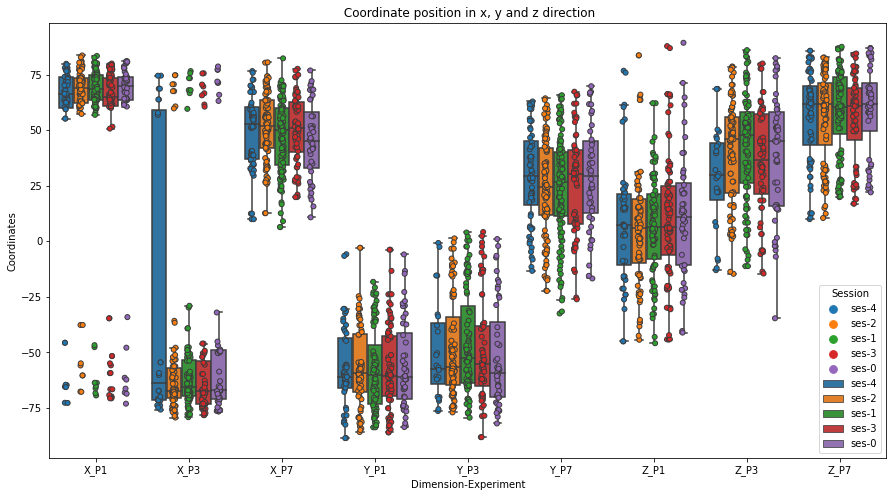

In [ ]:
df_concat_a=df_concat[df_concat['Electrode']=='Anode']
fig=plt.figure(figsize=(15,8))

df_concat_a=df_concat.sort_values(by=['Dimension' ,'Session', 'run'])


g=sns.stripplot(data=df_concat, x='Dimension-Experiment',y='Coordinates', hue='Session', jitter=True,linewidth=1, edgecolor='gray', dodge=True)
g=sns.boxplot(data=df_concat, x='Dimension-Experiment',y='Coordinates', hue='Session',fliersize=0.5).set(title=f' Coordinate position in x, y and z direction')

Unnamed: 0  Subject Experiment Electrode     run Session Dimension  \
0              3  sub-001         P1     Anode  run-01   ses-1         X   
1              4  sub-001         P1     Anode  run-01   ses-1         Y   
2              5  sub-001         P1     Anode  run-01   ses-1         Z   
3              6  sub-001         P1     Anode  run-01   ses-2         X   
4              7  sub-001         P1     Anode  run-01   ses-2         Y   
...          ...      ...        ...       ...     ...     ...       ...   
2383        4855  sub-062         P3  Cathode3  run-02   ses-3         Y   
2384        4856  sub-062         P3  Cathode3  run-02   ses-3         Z   
2385        4857  sub-062         P3  Cathode3  run-02   ses-4         X   
2386        4858  sub-062         P3  Cathode3  run-02   ses-4         Y   
2387        4859  sub-062         P3  Cathode3  run-02   ses-4         Z   

      Coordinate difference in mm        date  
0                        0.200946  2023-05-24  
1                        0.103142  2023-05-24  
2                        1.519130  2023-05-24  
3                        0.648800  2023-08-03  
4                        4.095999  2023-08-03  
...                           ...         ...  
2383                     7.529573  2023-10-22  
2384                     0.509415  2023-10-22  
2385                     9.854764  2023-10-29  
2386                     3.579661  2023-10-29  
2387                    12.968541  2023-10-29  

[2388 rows x 9 columns]

In [ ]:
"""
def check_cathodes_correct(df):
    #df['Coordinates_new']=df['Coordinates']
    #df['Coordinates_new']=0
    for sub in df['Subject'].unique():
        for ses in ['ses-1','ses-2','ses-3','ses-4']:
            for run in ['run-1','run-2']:
                for dim in df['Dimension'].unique():
                    #for electr in df['Electrode'].unique()[1:4]:
                    #comment if not corrected coordinates should be used
                    def log_Phrase(electr):
                        logical_Phrase_ses_X=(df['Subject']==sub) & (df['Electrode']==electr) & (df['Session']==ses) & (df['run']==run) & (df['Dimension']=='X')
                        logical_Phrase_base_X=(df['Subject']==sub) & (df['Electrode']==electr) & (df['Session']=='ses-0') & (df['run']=='baseline') & (df['Dimension']=='X')
                        logical_Phrase_ses_Y=(df['Subject']==sub) & (df['Electrode']==electr) & (df['Session']==ses) & (df['run']==run) & (df['Dimension']=='Y')
                        logical_Phrase_base_Y=(df['Subject']==sub) & (df['Electrode']==electr) & (df['Session']=='ses-0') & (df['run']=='baseline') & (df['Dimension']=='Y')
                        logical_Phrase_ses_Z=(df['Subject']==sub) & (df['Electrode']==electr) & (df['Session']==ses) & (df['run']==run) & (df['Dimension']=='Z')
                        logical_Phrase_base_Z=(df['Subject']==sub) & (df['Electrode']==electr) & (df['Session']=='ses-0') & (df['run']=='baseline') & (df['Dimension']=='Z')
                        return logical_Phrase_ses_X,logical_Phrase_ses_Y, logical_Phrase_ses_Z, logical_Phrase_base_Y, logical_Phrase_base_Z
                        
                    min=5
                    electr='Cathode1'
                    [logical_Phrase_ses_X,logical_Phrase_ses_Y, logical_Phrase_ses_Z, logical_Phrase_base_Y, logical_Phrase_base_Z]=log_Phrase(electr)
                    if all((abs((df[logical_Phrase_ses_Y]['Coordinates'].to_numpy()) - (df[logical_Phrase_base_Y]['Coordinates'].to_numpy()))< min) & (abs((df[logical_Phrase_ses_Z]['Coordinates'].to_numpy()) - (df[logical_Phrase_base_Z]['Coordinates'].to_numpy()))< min)):
                        print('nce')
                        #df[logical_Phrase_ses_X]['Coordinates_new']=df[logical_Phrase_ses_X]['Coordinates'].to_numpy()
                        #df[logical_Phrase_ses_Y]['Coordinates_new']=df[logical_Phrase_ses_Y]['Coordinates'].to_numpy()
                        #df[logical_Phrase_ses_Z]['Coordinates_new']=df[logical_Phrase_ses_Z]['Coordinates'].to_numpy()

                    electr='Cathode2'
                    [logical_Phrase_ses_X,logical_Phrase_ses_Y, logical_Phrase_ses_Z, logical_Phrase_base_Y, logical_Phrase_base_Z]=log_Phrase(electr)
                    if any((abs((df[logical_Phrase_ses_Y]['Coordinates'].to_numpy()) - (df[logical_Phrase_base_Y]['Coordinates'].to_numpy()))< min) & (abs((df[logical_Phrase_ses_Z]['Coordinates'].to_numpy()) - (df[logical_Phrase_base_Z]['Coordinates'].to_numpy()))< min)):
                        print('nce')
                        #df[logical_Phrase_ses_X]['Coordinates_new']=df[logical_Phrase_ses_X]['Coordinates'].to_numpy()
                        #df[logical_Phrase_ses_Y]['Coordinates_new']=df[logical_Phrase_ses_Y]['Coordinates'].to_numpy()
                        #df[logical_Phrase_ses_Z]['Coordinates_new']=df[logical_Phrase_ses_Z]['Coordinates'].to_numpy()

                    electr='Cathode3'
                    [logical_Phrase_ses_X,logical_Phrase_ses_Y, logical_Phrase_ses_Z, logical_Phrase_base_Y, logical_Phrase_base_Z]=log_Phrase(electr)
                    if any((abs((df[logical_Phrase_ses_Y]['Coordinates'].to_numpy()) - (df[logical_Phrase_base_Y]['Coordinates'].to_numpy()))< min) & (abs((df[logical_Phrase_ses_Z]['Coordinates'].to_numpy()) - (df[logical_Phrase_base_Z]['Coordinates'].to_numpy()))< min)):
                        #print('nce')
                        #df[logical_Phrase_ses_X]['Coordinates_new']=df[logical_Phrase_ses_X]['Coordinates'].to_numpy()
                        #df[logical_Phrase_ses_Y]['Coordinates_new']=df[logical_Phrase_ses_Y]['Coordinates'].to_numpy()
                        #df[logical_Phrase_ses_Z]['Coordinates_new']=df[logical_Phrase_ses_Z]['Coordinates'].to_numpy()
    return df,logical_Phrase_ses_Z

#[df_concat, logical_Phrase_ses_Z]=check_cathodes_correct(df_concat)
[df_dim_not_corrected, logical_Phrase_ses_Z]=check_cathodes_correct(df_dim_not_corrected)
"""
